1. Data  loading and finding missing values 

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [92]:
df = pd.read_csv("DecisionTreeRegressor_subset_picu_laura.csv")

In [93]:
df.columns

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SalePrice'],
      dtype='object')

In [94]:
df.shape

(1460, 20)

In [95]:
df.isna().any().any()


np.True_

In [96]:
df.isna().sum()

BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
SalePrice         0
dtype: int64

In [97]:
df.drop(columns=["FireplaceQu"], inplace=True)


In [98]:
df.shape

(1460, 19)

In [99]:
df.columns

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SalePrice'],
      dtype='object')

I identified the columns that don't have many missing values and changed their missing values with the implicit value "None".

In [100]:
garage_cols = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]

for col in garage_cols:
    df[col].fillna("None", inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_27872\1032320513.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("None", inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27872\1032320513.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna("None", inplace=True)


In [101]:
df.dtypes

BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
GarageType      object
GarageYrBlt     object
GarageFinish    object
GarageCars       int64
GarageArea       int64
GarageQual      object
GarageCond      object
PavedDrive      object
SalePrice        int64
dtype: object

Changed back GarageYrBlt from object to int.

In [102]:
df["GarageYrBlt"] = pd.to_numeric(df["GarageYrBlt"], errors='coerce')


In [103]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0).astype(int)


In [104]:
df.dtypes

BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
GarageType      object
GarageYrBlt      int64
GarageFinish    object
GarageCars       int64
GarageArea       int64
GarageQual      object
GarageCond      object
PavedDrive      object
SalePrice        int64
dtype: object

In [105]:
df.isna().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
PavedDrive      0
SalePrice       0
dtype: int64

2. Data preprocessing

In [106]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()


In [107]:
print(numeric_cols)

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [108]:
print(categorical_cols)

['KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


In [109]:
df.nunique()


BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
KitchenQual       4
TotRmsAbvGrd     12
Functional        7
Fireplaces        4
GarageType        7
GarageYrBlt      98
GarageFinish      4
GarageCars        5
GarageArea      441
GarageQual        6
GarageCond        6
PavedDrive        3
SalePrice       663
dtype: int64

In [110]:
df[categorical_cols].nunique()


KitchenQual     4
Functional      7
GarageType      7
GarageFinish    4
GarageQual      6
GarageCond      6
PavedDrive      3
dtype: int64

I skipped the step of filling the unique values of categorical columns One-Hot Encoding, because I chose to work only with numerical features.

3. Feature selection

In [111]:
X = df[["GarageArea", "GarageYrBlt"]]  
y = df["SalePrice"]


4. Splitting into train and test data

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. DecisionTreeRegressor 

In [114]:
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Prediction and evaluation

In [115]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 5758238361.165198
RMSE: 75883.05714166502
R²: 0.24928377155984494


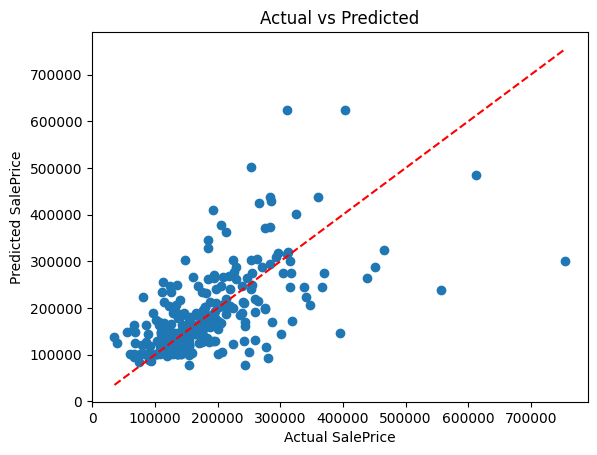

In [116]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Adjusting with max_depth

In [117]:
for depth in range(1, 11):
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Max depth: {depth}, R²: {r2:.3f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

Max depth: 1, R²: 0.305, MSE: 5327179278.27, RMSE: 72987.53
Max depth: 2, R²: 0.470, MSE: 4062858697.69, RMSE: 63740.56
Max depth: 3, R²: 0.497, MSE: 3861861620.42, RMSE: 62143.88
Max depth: 4, R²: 0.530, MSE: 3601230275.56, RMSE: 60010.25
Max depth: 5, R²: 0.518, MSE: 3696247781.09, RMSE: 60796.77
Max depth: 6, R²: 0.548, MSE: 3463303948.33, RMSE: 58849.84
Max depth: 7, R²: 0.494, MSE: 3878025402.23, RMSE: 62273.79
Max depth: 8, R²: 0.377, MSE: 4779213766.11, RMSE: 69131.86
Max depth: 9, R²: 0.397, MSE: 4628405892.99, RMSE: 68032.39
Max depth: 10, R²: 0.364, MSE: 4881835019.67, RMSE: 69870.13


In [118]:
print(reg.feature_importances_)


[0.72508218 0.27491782]


7. Results interpretation

When inspecting the metrics I had taken into consideration finding values that have high R² and low RMSE.
The initial results of the model without adjusting for max_depth were the following:

MSE: 5758238361.165198
RMSE: 75883.05714166502
R²: 0.24928377155984494

After adjusting with max_depth:

Max depth: 1, R²: 0.305, MSE: 5327179278.27, RMSE: 72987.53
Max depth: 2, R²: 0.470, MSE: 4062858697.69, RMSE: 63740.56
Max depth: 3, R²: 0.497, MSE: 3861861620.42, RMSE: 62143.88
Max depth: 4, R²: 0.530, MSE: 3601230275.56, RMSE: 60010.25
Max depth: 5, R²: 0.518, MSE: 3696247781.09, RMSE: 60796.77
Max depth: 6, R²: 0.548, MSE: 3463303948.33, RMSE: 58849.84
Max depth: 7, R²: 0.494, MSE: 3878025402.23, RMSE: 62273.79
Max depth: 8, R²: 0.377, MSE: 4779213766.11, RMSE: 69131.86
Max depth: 9, R²: 0.397, MSE: 4628405892.99, RMSE: 68032.39
Max depth: 10, R²: 0.364, MSE: 4881835019.67, RMSE: 69870.13

Taking into consideration that R² predicts the variance in SalePrice and ranges in value between 0 and 1 and TtheHE initial result was 0.24 (explaining only 24% of the variance), it means the model fit worse.

In the initial results, the RMSE is very high, meaning that the price predicted is far from the actual price.

By adjusting with max_depth, we can see more options, the best being 6 (at most 6 splits), because it has the least difference from the actual prices: 58849.84 and R² is over 50% in explaining the variance: 0.548 (the closer to 1, the better).

I have also checked the importance of the features, getting the following results: 0.72168072 (for GarageArea) and 0.27831928 (for GarageYrBlt), which show that the model used GarageArea in proportion of 72% to predict SalePrice, thus GarageArea is a better predictor than GarageYrBlt and it reduces the prediction error more effectively. 

As a conclusion, the model fared better after adjusting for max_depth.
